In [13]:
def oracle(circuit,val):
    circuit.barrier()
    val=bin(val)[2:]
    val=val.zfill(3)
    
    for i in range(len(val)):
        if val[i]=='0':
            circuit.x(qr[len(val)-1-i])
            
   
    circuit.ccz(qr[0],qr[1],qr[2])
    

    for i in range(len(val)):
        if val[i]=='0':
            circuit.x(qr[len(val)-1-i])
                
def diffusion(circuit):
    circuit.barrier()
    circuit.h(qr)
    circuit.x(qr)
    circuit.h(2)
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.h(2)
    circuit.x(qr)
    circuit.h(qr)

def grover(circuit,list,last):
    keep=[]
    for i in range(len(list[last])):
        if list[last][i]!=0:
            keep.append(i)
    
    
    for val in keep:
        
        oracle(circuit,val)
    diffusion(circuit)






[[0, 0, 1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1]]
0
['si', 'mi', 'mi', 'la', 'la', 'la', 'la', 'la', 'la', 'mi']


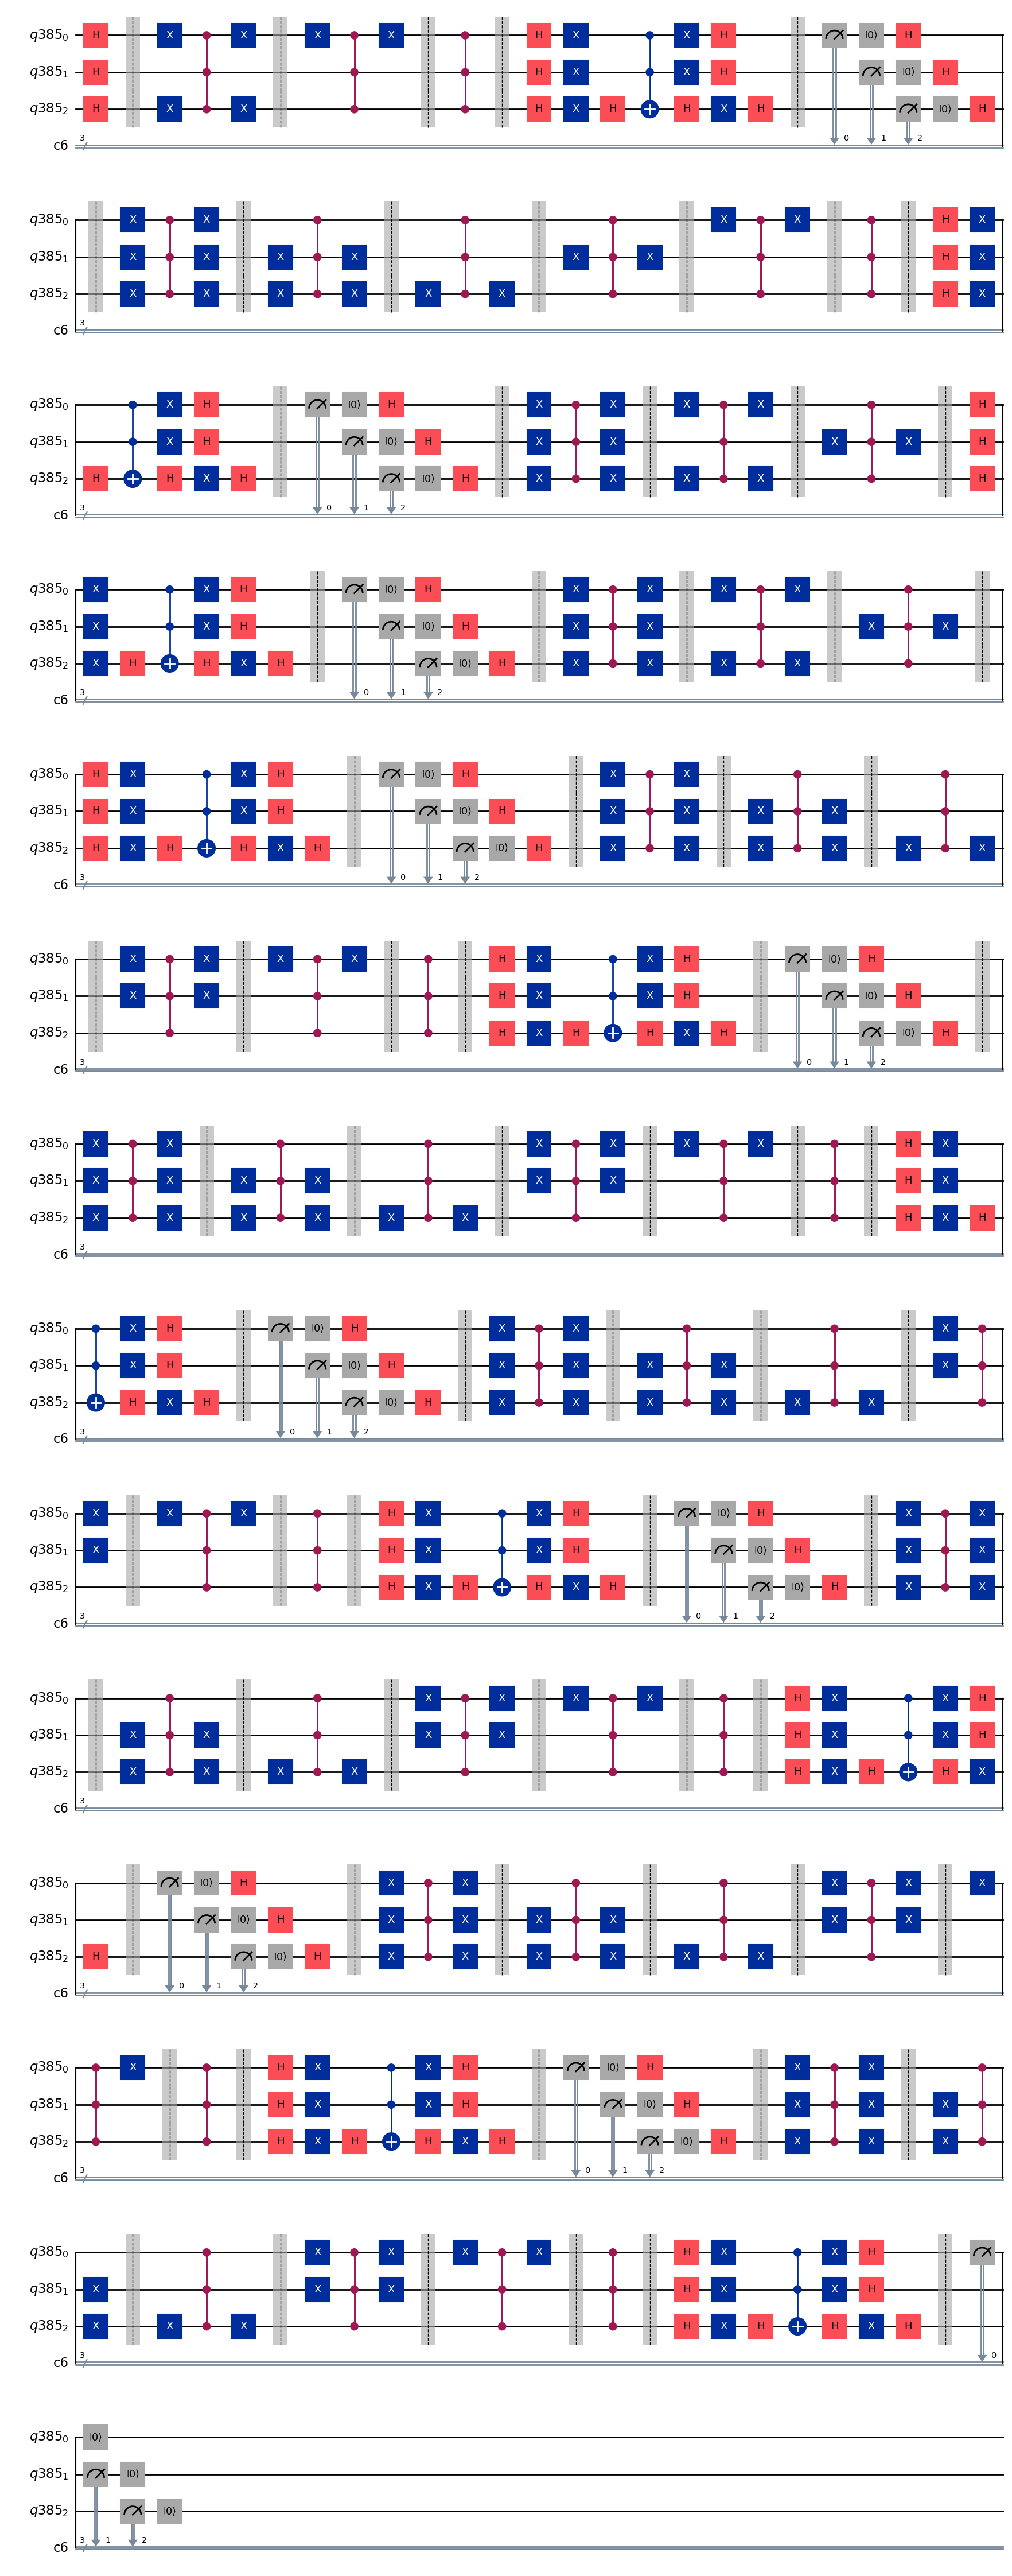

In [14]:
import qiskit
from qiskit_aer import*
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from collections import Counter
import random
import winsound
import time
list=[[random.randint(0,1) for i in range(8)] for j in range(8)]
print(list)

notes = {'do': 523, 're': 587, 'mi': 659, 'fa': 698, 'sol': 784, 'la': 880, 'si': 988, 's': 0}
note=[]
qr=qiskit.QuantumRegister(3)
cr=qiskit.ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)
n=10
last=0
print(last)
for i in range(n):
    
    circuit.h([0,1,2])
    for i in range(1):
        pass
        grover(circuit,list,last)
    circuit.barrier()
    circuit.measure(qr,cr)
    circuit.reset(qr)
    simulator=Aer.get_backend('qasm_simulator')
    newcicuit=transpile(circuit,backend=simulator)
    result=simulator.run(newcicuit,shots=1000).result()
    counts=result.get_counts()
    counter = Counter(counts)
    most_common_result, most_common_count = counter.most_common(1)[0]
    last=int(most_common_result,2)
    if last==0:
        note.append('do')
    elif last==1:
        note.append('re')
    elif last==2:
        note.append('mi')
    elif last==3:
        note.append('fa')
    elif last==4:
        note.append('sol')
    elif last==5:
        note.append('la')
    elif last==6:
        note.append('si')
    elif last==7:
        note.append('s')
    else:
        print('error')
print(note)

for i in note:
    if i!='s':
     winsound.Beep(notes[i], 500)
    else:
        time.sleep(0.5)
circuit.draw(output='mpl')